Error is a key part of machine learning algorithms  
a low error might be good as well bad  
Lets go back to week 3 and do the analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
p1= PolynomialFeatures(degree=2)        # lets start with degree 2
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

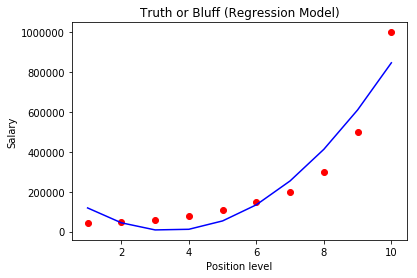

In [5]:
plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

You might remember this plot  
where dots are actual points and line is the prediction  
If you notice it's not overlapping and has a fairly low accuracy  
lets try with degree 3 onwards
# Degree = 3

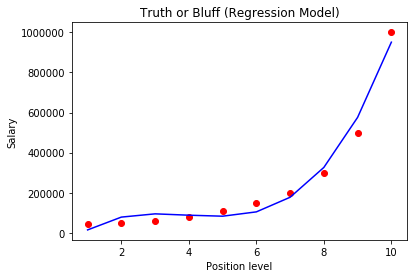

In [6]:
p1= PolynomialFeatures(degree=3)        
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Degree = 4

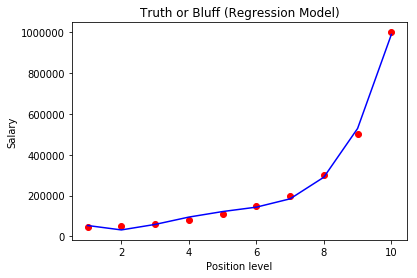

In [7]:
p1= PolynomialFeatures(degree=4)        
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Degree = 5

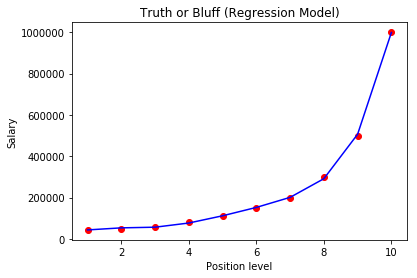

In [8]:
p1= PolynomialFeatures(degree=5)        
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

we achieved this at level 5  
Lets go on to level 10
# degree = 10

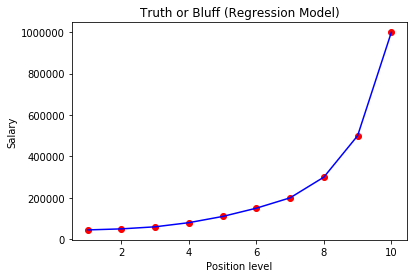

In [9]:
p1= PolynomialFeatures(degree=10)        
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

So its seems the same buts there's a key difference  
## our model is overfitting!!  
and how do we know?
Let's change some value in y

In [10]:
y[5]=250000

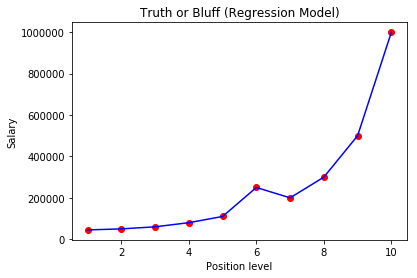

In [11]:
p1= PolynomialFeatures(degree=10)        
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# so our graph changed!
but why did this happened?  
In reality there is always a scope of error.  
introduction of on error must not effect our model to a great extend  
if this happens even know it seems a huge increase in accuracy our prediction may or may not be correct and hence accuracy on test decreases

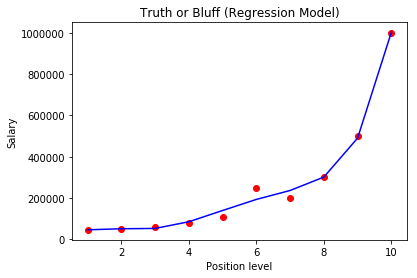

In [12]:
p1= PolynomialFeatures(degree=5)        
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Lets consider one more example from week 4

In [13]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


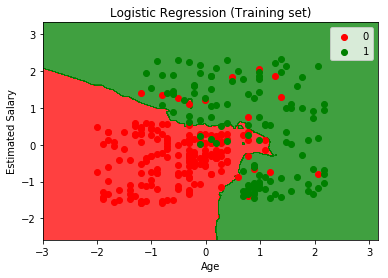

In [18]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


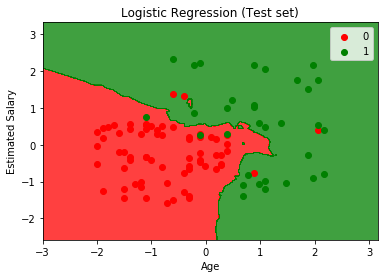

In [19]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Lets try increasing the neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 4, 28]], dtype=int64)

so number of wrong cases increases!!  
Lets try again

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [15, 17]], dtype=int64)

## Oh damn

So this was the disadvantage  
Now practically its difficult to change and view results to prevent over fitting or under  
# So we do regularization
View here for the maths https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html

In [22]:
data=pd.read_csv('data/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
x=data['YearsExperience'].values.reshape(-1,1)
y=data['Salary'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)

Let's start with by doing linear regression which we did in week 3

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)

linear regression train score: 0.9639293323323473
linear regression test score: 0.8910792481155525


No let's use a class to regularize and fit

In [25]:
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)

ridge regression train score low alpha: 0.9639293294325193
ridge regression test score low alpha: 0.8910841966978833


Lets increase again

In [26]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

ridge regression train score high alpha: 0.842983787577768
ridge regression test score high alpha: 0.7210870608424063


Oh damn not again !!  
So you see regualization only help upto a certain extend and improvise the exsisting model  
Let's see another model to do the same

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print ("ridge regression train score high alpha:", train_score)
print ("ridge regression test score high alpha:", test_score)

ridge regression train score high alpha: 0.9639293321784463
ridge regression test score high alpha: 0.8910803890019197


In [28]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)


training score for alpha=0.01: 0.9639293323323319
test score for alpha =0.01:  0.8910792595269607


# Support vector machine
Please refer here for knowledge  https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72  
Just remember they are commputational expensive and time consuming compared to others

In [29]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


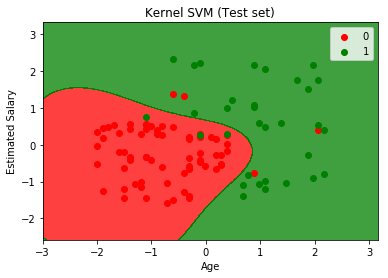

In [33]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()